# Data Science

In [106]:
import pandas as pd
import plotly.express as px
import sqlite3
import streamlit as st

# Charger les données des objets trouvés et des gares depuis la base de données SQLite
conn = sqlite3.connect('objets_trouves.db')
query_objets_trouves = "SELECT * FROM objets_trouves"
query_temperature = "SELECT * FROM temperature"
df_objets_trouves = pd.read_sql_query(query_objets_trouves, conn)
df_temperature = pd.read_sql_query(query_temperature, conn)

In [107]:
df_objets_trouves['date'] = df_objets_trouves['date'].apply(lambda x: pd.to_datetime(x).date() if pd.notnull(x) else x)
df_temperature['date'] = df_temperature['date'].apply(lambda x: pd.to_datetime(x).date() if pd.notnull(x) else x)

In [108]:
df_objets_trouves=df_objets_trouves.groupby(['date']).count()['gare'].rename('nombre_objets').to_frame().reset_index()

In [109]:
df = pd.merge(df_objets_trouves, df_temperature, on='date')
df

,date,nombre_objets,id,temperature
0,2019-01-01,5,70,7.671429
1,2019-01-02,90,424,5.966667
2,2019-01-03,107,1308,4.571429
3,2019-01-04,84,748,3.950000
4,2019-01-05,78,71,4.800000
...,...,...,...,...
1423,2022-12-27,84,365,6.085714
1424,2022-12-28,67,898,9.625000
1425,2022-12-29,65,897,9.762500
1426,2022-12-30,61,469,9.371429


## Afficher le nombre d’objets trouvés en fonction de la température sur un scatterplot. Est ce que le nombre d’objets perdus est corrélé à la temperature d'après ce graphique?

In [110]:
# Création du scatterplot
fig = px.scatter(df, x='temperature', y='nombre_objets', 
                 title='Relation entre la température et le nombre d\'objets trouvés')
fig.show()

Non, le nombre d'objets trouvés ne semble pas corrélé à la temperature selon ce graphique. Cependant pour avoir une idée définitive il faut prendre en compte la température et voir si pour un même nombre de personne il y a plus ou moins d'objets trouvés selon les saisons. 

## Quelle est la médiane du nombre d’objets trouvés en fonction de la saison? Il y a t il une correlation entre ces deux variables d'après le graphique?

In [111]:
# Définir une fonction pour déterminer la saison en fonction du mois
def get_season(month):
    if month in [12, 1, 2]:
        return "hiver"
    elif month in [3, 4, 5]:
        return "printemps"
    elif month in [6, 7, 8]:
        return "été"
    else:
        return "automne"

# Ajouter une nouvelle colonne "saison" au dataframe
df["saison"] = pd.to_datetime(df["date"]).dt.month.apply(get_season)

In [112]:
df

,date,nombre_objets,id,temperature,saison
0,2019-01-01,5,70,7.671429,hiver
1,2019-01-02,90,424,5.966667,hiver
2,2019-01-03,107,1308,4.571429,hiver
3,2019-01-04,84,748,3.950000,hiver
4,2019-01-05,78,71,4.800000,hiver
...,...,...,...,...,...
1423,2022-12-27,84,365,6.085714,hiver
1424,2022-12-28,67,898,9.625000,hiver
1425,2022-12-29,65,897,9.762500,hiver
1426,2022-12-30,61,469,9.371429,hiver


In [113]:
# Regrouper les données par saison et calculer la médiane
median_objets_trouves = df.groupby("saison")["nombre_objets"].median()

# Afficher les médianes
print("Médiane journalière du nombre d'objets trouvés par saison :")
print(median_objets_trouves)

Médiane journalière du nombre d'objets trouvés par saison :
saison
automne      62.5
hiver        54.0
printemps    52.0
été          62.0
Name: nombre_objets, dtype: float64


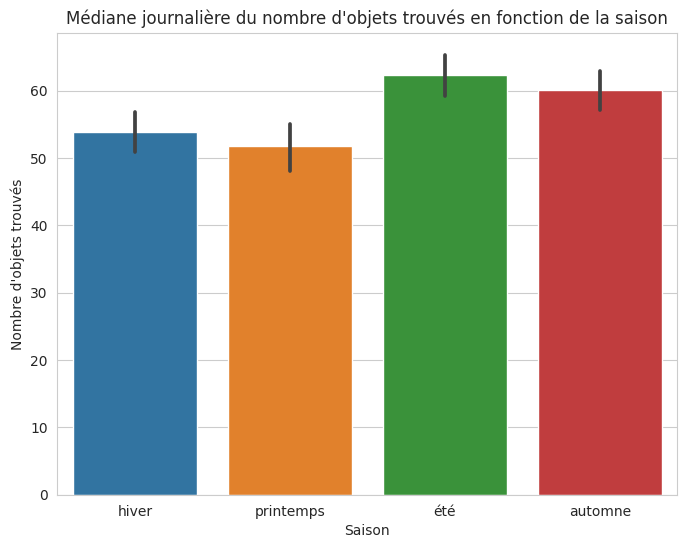

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer un graphique en barres avec Seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x="saison", y="nombre_objets", data=df)
plt.title("Médiane journalière du nombre d'objets trouvés en fonction de la saison")
plt.xlabel("Saison")
plt.ylabel("Nombre d'objets trouvés")

plt.show()

En ce qui concerne la corrélation entre ces deux variables, le graphique montre une légère tendance à une plus grande quantité d'objets trouvés en automne et en été, tandis que les quantités trouvées en hiver et au printemps sont plus faibles. Cependant, il n'y a pas de forte corrélation entre la saison et le nombre d'objets trouvés, car la variance des nombres d'objets trouvés à travers les différentes saisons est assez importante. Cela peut également être confirmé par le fait que la différence de médiane entre les saisons est relativement faible et très certainement lié à la fréquentation plus qu'à la saison.

## Affichez le nombre d'objets trouvés en fonction du type de d'objet et de la saison sur un graphique. Il y a t il une correlation entre ces deux variables d'après le graphique?

In [115]:
df_objets_trouves = pd.read_sql_query(query_objets_trouves, conn)
df_objets_trouves['date'] = df_objets_trouves['date'].apply(lambda x: pd.to_datetime(x).date() if pd.notnull(x) else x)
df = pd.merge(df_objets_trouves, df, on='date')

In [116]:
df = df.groupby(['saison', 'type']).count()['gare'].rename('nombre_objets').to_frame().reset_index()
df

,saison,type,nombre_objets
0,automne,"Appareils électroniques, informatiques, appare...",3447
1,automne,"Articles d'enfants, de puériculture",138
2,automne,"Articles de sport, loisirs, camping",138
3,automne,Articles médicaux,123
4,automne,"Bagagerie: sacs, valises, cartables",7651
...,...,...,...
59,été,Parapluies,115
60,été,Pièces d'identités et papiers personnels,2418
61,été,"Porte-monnaie / portefeuille, argent, titres",3689
62,été,"Vélos, trottinettes, accessoires 2 roues",263


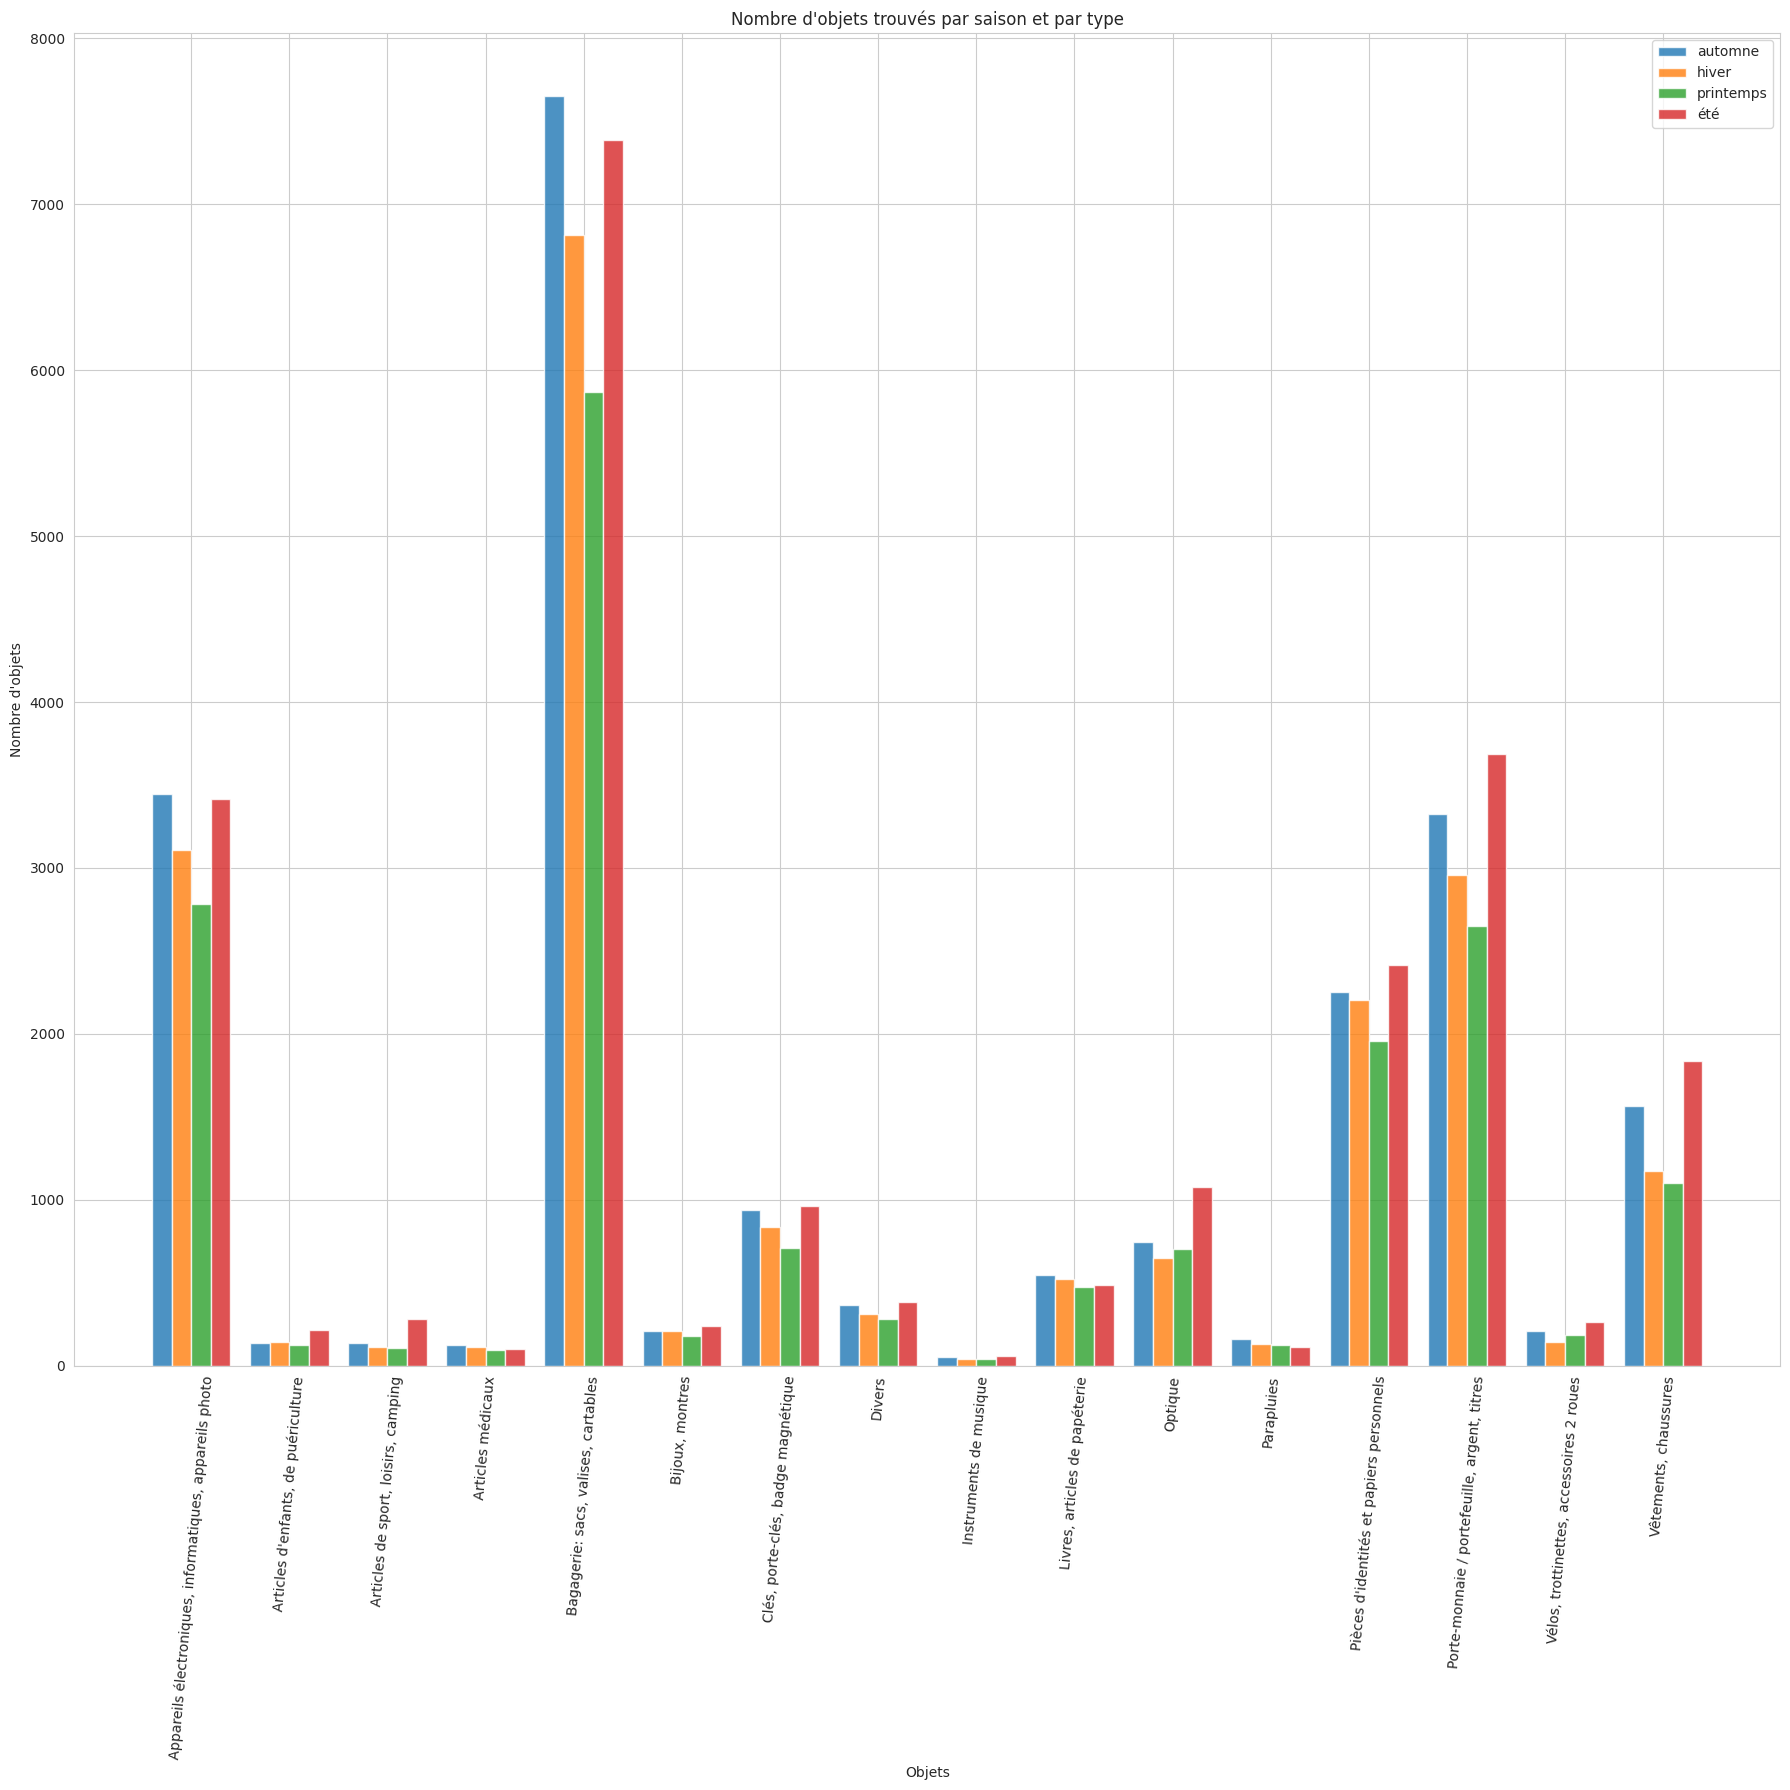

In [117]:
import matplotlib.pyplot as plt
import numpy as np

# Vos données
saisons = df['saison'].unique()
objets = df['type'].unique()
data = np.zeros((len(objets), len(saisons)))
for i, saison in enumerate(saisons):
    saison_data = df[df['saison']==saison]
    for j, objet in enumerate(objets):
        objet_data = saison_data[saison_data['type']==objet]
        if len(objet_data) > 0:
            data[j, i] = objet_data.iloc[0]['nombre_objets']

# Créer le graphique à barres groupées
fig, ax = plt.subplots(figsize=(18, 18))
index = np.arange(len(objets))
bar_width = 0.2
opacity = 0.8

for i, saison in enumerate(saisons):
    ax.bar(index + i*bar_width, data[:, i], bar_width, alpha=opacity, label=saison)

ax.set_xlabel('Objets')
ax.set_ylabel('Nombre d\'objets')
ax.set_title('Nombre d\'objets trouvés par saison et par type')
ax.set_xticks(index + bar_width*1.5,)
ax.set_xticklabels(objets, rotation=85)
ax.legend()

plt.tight_layout()
plt.show()



Oui il y a une petite corrélation entre le type d'objet et la saison, les articles de camping sont le plus oubliés en été par exemple ou encore les lunettes en été également de par la présence des lunettes de soleil.